#Programming Lab 1
Daniel Diamont
UT EID: dd28977

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
from IPython.display import display, HTML
%matplotlib inline

##Q1)

In [3]:
# Create two normal distributions
n1 = np.random.normal(loc = -10, scale = 5, size = 1000)
n2 = np.random.normal(loc = 10, scale = 5, size = 1000)


###a)

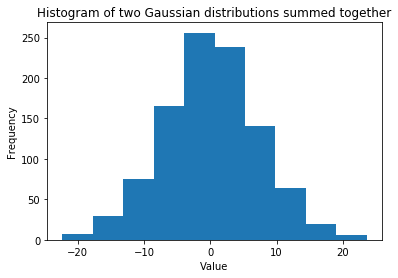

estimated mean of the new distribution is: 0.20717392672188373
estimated variance of the new distribution is: 51.339086679113755


In [4]:
# take the sum of 2 gaussians by adding two sets of 1000 points, point by point
n_sum = n1 + n2

# plot in a histogram
plt.hist(n_sum)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of two Gaussian distributions summed together")
plt.show()

#estimate mean and variance of sum
mean = np.mean(n_sum, dtype=np.float64)
print("estimated mean of the new distribution is: " + str(mean))
var = np.var(n_sum, dtype=np.float64)
print("estimated variance of the new distribution is: " + str(var))

##Q2)

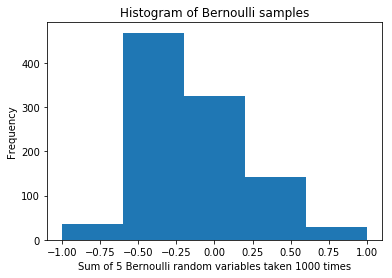

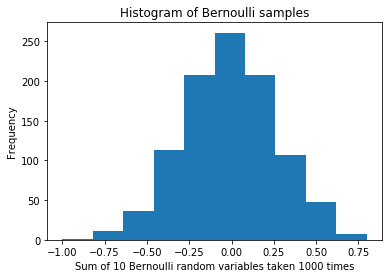

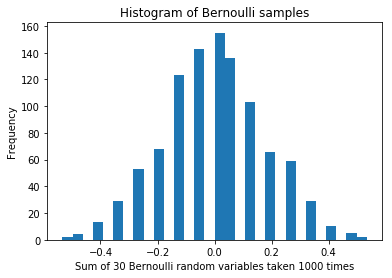

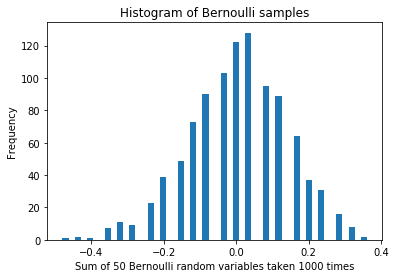

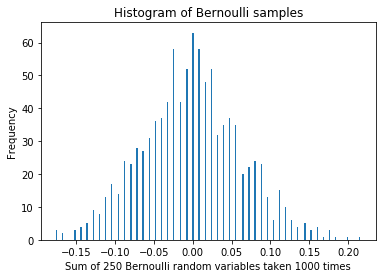

In [5]:
# define Xi random variable (iid Bernoulli ({-1,1})
def sample_Xi(n):
    sum = np.zeros(n)
    
    for i in range(n):
        sample = np.random.uniform()
        if(sample >= 0.5):
            sum[i] = 1
        else:
            sum[i] = -1
    
    return np.sum(sum)/n
    
def plot_hist(n, draws=1000):
    Zn = np.zeros(draws)
    
    for i in range(draws):
        Zn[i] = sample_Xi(n)
        
    plt.hist(Zn, bins=n)
    plt.title("Histogram of Bernoulli samples")
    plt.xlabel("Sum of " + str(n) + " Bernoulli random variables taken " + str(draws) + " times")
    plt.ylabel("Frequency")
    plt.show()
    
    
plot_hist(5)
plot_hist(10)
plot_hist(30)
plot_hist(50)
plot_hist(250)


##Q3)

In [6]:
# generate 25,000 samples from a gaussian distribution with mean 0 and std dev 5
norm_dist = np.random.normal(loc = 0, scale = 5, size = 25000)

# calculate estimated mean
mean_est = np.sum(norm_dist)/(norm_dist.size)
print("Estimated mean of distribution is: " + str(mean_est))

#calculate variance E[(X - E[X])^2]
x_minus_mean_sq = (norm_dist - mean_est)*(norm_dist - mean_est)
var_est = np.sum(x_minus_mean_sq)/(x_minus_mean_sq.size)

#calculate standard deviation as sqrt(variance)
std_dev = np.sqrt(var_est)

print("Estimated std dev of distribution is: " + str(std_dev))

Estimated mean of distribution is: -0.02050584343070208
Estimated std dev of distribution is: 4.995126198325918


##Q4)

In [7]:
#mean matrix
u = [-5,5]
#covariance matrix
covar = [[20, 0.8],[0.8,30]]

# generate 10,000 samples of 2D data from Gaussian distribution
d1,d2 = np.random.multivariate_normal(u, covar, 10000).T

#estimate the mean of the distribution
u1 = np.sum(d1)/d1.size
u2 = np.sum(d2)/d2.size
u_est = u1 + u2

#estimate the covariance matrix for the data
t1 = (d1-u1)*(d1-u1)
var1 = np.sum(t1)/t1.size #variance of distribution 1
t2 = (d2-u2)*(d2-u2)
var2 = np.sum(t2)/t2.size #variance of distribution 2

t_co = (d1-u1)*(d2-u2)
covar = np.sum(t_co)/t_co.size #covariance of distribution 1 and 2

cov = [] # covariance matrix
cov.append([var1,covar])
cov.append([covar,var2])

print("Estimated mean of the distribution: " + str(u_est))
print("Covariance matrix of the distribution: ")

df = pd.DataFrame(cov)
df.rename(index={0:'d1',1:'d2'}, inplace=True)
df.rename(columns={0:'d1',1:'d2'}, inplace=True)
display(df)


Estimated mean of the distribution: 0.01887937608621737
Covariance matrix of the distribution: 


,d1,d2
d1,20.416470,0.646462
d2,0.646462,29.880414


##Q5)

Feature Exploration

In [8]:
#load PatientData
data = pd.read_csv("PatientData.csv",header=None,na_values='?')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


###a) How many patients and how many features?

In [9]:
data.shape

(452, 280)

We can see that there are 451 rows and 280 columns referring to 451 patients with 280 features per patient

###b) What is the meaning of the first four features?

Exploring column 0

In [59]:
data[0].describe()

count    452.000000
mean      46.471239
std       16.466631
min        0.000000
25%       36.000000
50%       47.000000
75%       58.000000
max       83.000000
Name: 0, dtype: float64

(array([ 1.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  3.,  2.,  2.,  0.,  0.,
         3.,  1.,  2.,  1.,  0.,  2.,  1.,  3.,  3.,  4.,  0.,  3.,  2.,
         2.,  0.,  3.,  0.,  4.,  3.,  7.,  3.,  3.,  0.,  7.,  6.,  7.,
         7.,  9.,  0., 13., 14., 14.,  5.,  8.,  0., 12.,  6.,  8.,  7.,
         0., 13., 13., 15., 14., 11.,  0.,  8., 12.,  7.,  6., 10.,  0.,
         9.,  6.,  9., 12., 11.,  0.,  9.,  4.,  5., 10.,  8.,  0., 11.,
         6.,  8.,  6.,  4.,  0.,  4.,  5.,  4.,  7.,  4.,  0.,  2.,  6.,
         1.,  1.,  2.,  0.,  1.,  2.,  1.,  0.,  1.]),
 array([ 0.  ,  0.83,  1.66,  2.49,  3.32,  4.15,  4.98,  5.81,  6.64,
         7.47,  8.3 ,  9.13,  9.96, 10.79, 11.62, 12.45, 13.28, 14.11,
        14.94, 15.77, 16.6 , 17.43, 18.26, 19.09, 19.92, 20.75, 21.58,
        22.41, 23.24, 24.07, 24.9 , 25.73, 26.56, 27.39, 28.22, 29.05,
        29.88, 30.71, 31.54, 32.37, 33.2 , 34.03, 34.86, 35.69, 36.52,
        37.35, 38.18, 39.01, 39.84, 40.67, 41.5 , 42.33, 43.16, 43.99,
        

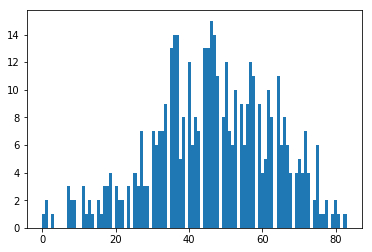

In [11]:
plt.hist(data[0], bins=100)

I suspect that this is patient age given that the mean is about 46.5 years of age. I suspect that the population of the U.S. has a mean within one standard deviation of this distribution. Additional notes supporting this assertian are that there are no outliers and no negative numbers.

Let's check US census data to see if this makes sense.

Link to dataset from US census: https://www.census.gov/data/tables/2017/demo/popest/nation-detail.html#par_textimage_98372960

This dataset contains the age of people in the U.S. during the 2010 Census.

In [13]:
us_census_data = pd.read_csv("nc-est2017-agesex-res.csv",header=None,na_values='?')
us_census_data.head

<bound method NDFrame.head of       0    1              2                  3                4   \
0    SEX  AGE  CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010   
1      0    0        3944153            3944160          3951454   
2      0    1        3978070            3978090          3957695   
3      0    2        4096929            4096939          4090616   
4      0    3        4119040            4119051          4111682   
5      0    4        4063170            4063186          4077326   
6      0    5        4056858            4056872          4064480   
7      0    6        4066381            4066412          4072889   
8      0    7        4030579            4030594          4042967   
9      0    8        4046486            4046497          4025495   
10     0    9        4148353            4148369          4125317   
11     0   10        4172541            4172559          4186959   
12     0   11        4114415            4114443          4115452   
13     0   12     

In [14]:
# plot number of people vs. age for last full census done in 2010
us_census_data_short = us_census_data[2].iloc[1:101] #make no distinction among sex
us_census_data_short = us_census_data_short.astype('int64')
us_census_data_short.head()

1    3944153
2    3978070
3    4096929
4    4119040
5    4063170
Name: 2, dtype: int64

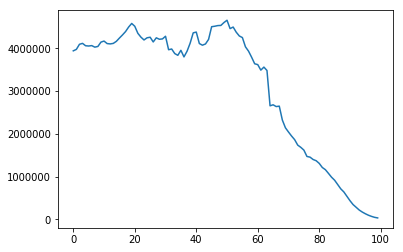

In [15]:
# plot # of people at each age

age = np.arange(100)
plt.plot(age,us_census_data_short)

In [16]:
# calculate mean age
total_pop = us_census_data[2][102]
total_pop
sum = np.zeros(100)
var = np.zeros(100)

short_np = us_census_data_short.values
short_np = short_np/float(total_pop) # turn frequency into probability masses

# short_np[5]
# us_census_data_short[5]*age[5]
for i in range(100):
    sum[i] = (short_np[i]*i)
    
mean_age = np.sum(sum)

print("Mean age of population in US during 2010 census: " + str(mean_age))

Mean age of population in US during 2010 census: 37.29410567546405


Because the mean of the US population is within the mean + standard deviation of feature 0, a good guess for feature 0 is patient age.

Now, to explore feature one

In [63]:
data[1].describe()

count    452.000000
mean       0.550885
std        0.497955
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: 1, dtype: float64

The data appears to be binary in nature. Let's plot it with a scatterplot.

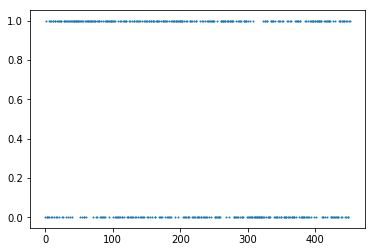

In [61]:
plt.scatter(np.arange(data[1].size),data[1], s = 1)

The data looks binary, and looks pretty equally distributed among 0's and 1's. Since these are patients, it is possible that feature 1 could be gender, as that one be a simple and relevant way to classify each patient for medical purposes.

Let's explore feature 2.
Plotting a histogram and scatterplot for feature 2:

Mean: 166.18805309734512


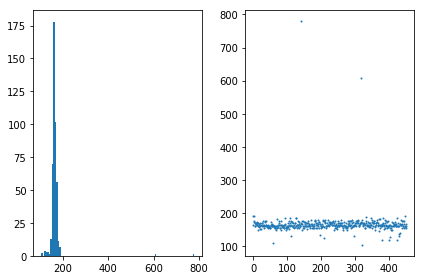

In [64]:
plt.subplot(1,2,1)
plt.hist(data[2],bins=100)
plt.subplot(1,2,2)
plt.scatter(np.arange(data[2].size),data[2], s = 1)
plt.tight_layout()

print("Mean: " + str(data[2].mean()))


In [65]:
data[2].describe()

count    452.000000
mean     166.188053
std       37.170340
min      105.000000
25%      160.000000
50%      164.000000
75%      170.000000
max      780.000000
Name: 2, dtype: float64

Looks like the data is centered around 166 and there are a couple of outliers larger than 600. Let's get a closer look at the histogram without the (possile) outliers to see if it is gaussian.

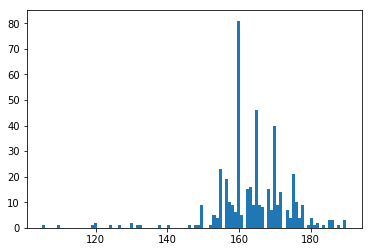

In [68]:
feature2 = data[2]
feature2_filtered = feature2[(feature2 < 600)]
plt.hist(feature2_filtered, bins=100)
feature2_mean = feature2_filtered.mean()
feature2_std = feature2_filtered.std()

In [67]:
feature2_filtered.describe()

count    450.000000
mean     163.842222
std       10.412195
min      105.000000
25%      160.000000
50%      164.000000
75%      170.000000
max      190.000000
Name: 2, dtype: float64

The data looks Gaussian. If it is an attribute of a patient like height, weight, body mass index, etc, it would explain why the values are small for small ages, large for ages in the middle of the dataset, and smaller again for old ages.

Let's move on to feature 3 for now.

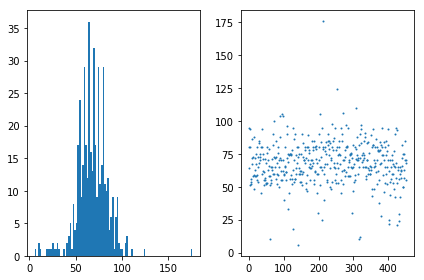

In [70]:
feature3 = data[3]
plt.subplot(1,2,1)
plt.hist(feature3,bins=100)
plt.subplot(1,2,2)
plt.scatter(np.arange(feature3.size),feature3, s = 1)
plt.tight_layout()

In [69]:
feature3.describe()

count    452.000000
mean      68.170354
std       16.590803
min        6.000000
25%       59.000000
50%       68.000000
75%       79.000000
max      176.000000
Name: 3, dtype: float64

Data also looks Gaussian, but we are going to need some more help to decode what this data is. If I am right about feature 1 being gender, then perhaps we will see a difference in feature 2 and feature 3 with respect to gender.

In [83]:
data_filt = data[[0,1,2,3]]
data_filt_grouped = data_filt.groupby(1).mean()
print(data_filt_grouped)

           0           2          3
1                                  
0  47.546798  171.315271  72.724138
1  45.594378  162.008032  64.457831


Looks like there is indeed a difference between the two subgroups. Considering body measurement metrics like height, weight, and BMI, it would make sense that the average values in these categories would be greater for males than the average values for women. Let's operate under the assumption that males are in subgroup 0 and women are in subgroup 1.

Now, let's try to identify the remaining two features. We can check for height and weight.

The National Center for Health Statistics has reported that the average height for an adult male (age 20 and over) is 69.2" (175.8 cm) and the average weight is 195.7 lbs (88.8 kg) For adult women, the average height is 63.7" (161.8 cm) and average weight is 168.5 lbs (76.43 kg).

Link: https://www.cdc.gov/nchs/fastats/body-measurements.htm

In [87]:
data_filt_adult = data_filt[data_filt[0] > 20]
data_filt_adult_grouped = data_filt_adult.groupby(1).mean()
print(data_filt_adult_grouped)

           0           2          3
1                                  
0  51.005405  170.875676  75.740541
1  47.798283  160.115880  66.145923


In [98]:
# describe features 2 and 3
data_filt_adult = data_filt_adult[[1,2,3]]
data_filt_adult.groupby(1).describe()

2                                                               3  \
   count        mean       std    min    25%    50%    75%    max  count   
1                                                                          
0  185.0  170.875676  6.690414  152.0  166.0  170.0  175.0  190.0  185.0   
1  233.0  160.115880  4.966210  146.0  156.0  160.0  163.0  174.0  233.0   

                                                        
        mean        std   min   25%   50%   75%    max  
1                                                       
0  75.740541  14.013492  18.0  68.0  75.0  82.0  176.0  
1  66.145923  13.088399  42.0  56.0  64.0  72.0  124.0

We can see that for features 2 and 3, the average height and weight (from NCHS) for both men and women, lie within one standard deviation of the average height and weight for both men and women in our patient data. This suggests that indeed feature 2 is patient height in centimeters, and feature 3 is patient weight in kilograms.

###c) Replace missing values with average of corresponding feature column

In [99]:
data.fillna(data.mean()) # fill NaN values

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
5,13,0,169,51,100,167,321,174,91,107,...,-0.6,12.2,-2.8,0.0,0.0,0.9,2.2,13.5,31.1,14
6,40,1,160,52,77,129,377,133,77,77,...,0.0,6.5,0.0,0.0,0.0,0.4,1.0,14.3,20.5,1
7,49,1,162,54,78,0,376,157,70,67,...,0.0,8.2,-1.9,0.0,0.0,0.1,0.5,15.8,19.8,1
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
9,50,1,167,67,89,130,383,156,73,85,...,-0.6,10.8,-1.7,0.0,0.0,0.8,0.9,20.1,25.1,10


###d) How could you test which features strongly influence the patient condition and which do not?

One way to do this would be to calculate the correlation between each feature column with the label column. The columns that have a higher absolute value for the correlation are the columns which influence the patient condition the most.